<a href="https://colab.research.google.com/github/SofiNurul/SKRIPSI/blob/main/Salinan_dari_BISMILLAH_SKRIPSI_ANALISIS_SENTIMEN_ULASAN_PRODUK_PENGHILANG_BEKAS_LUKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

---




In [73]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support

Mengunduh resource nltk yang diperlukan



In [74]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Information Extraction (IE) : Import Dataset**

---



Muat dataset

In [75]:
# Memuat dataset
df = pd.read_csv('data_kotor.csv', encoding='MacRoman')
# Menampilkan 5 data teratas dan 5 data terakhir
df_combined = pd.concat([df.head(5), df.tail(5)], axis=0)
# Menampilkan hasil
df_combined

,username,date,content,score
0,z*****e,10/10/2024,Pertama kali coba karena baca ulasan di Quora ...,4
1,dindardew,03/09/2024,Penasaran bgt dari dulu udah laser jg bekas lu...,5
2,dikamungil,03/09/2024,"Udah ku pke beberapa kali sih, semoga bermanfa...",5
3,cakranouval,11/08/2024,"kecewa, kemasan penyok",3
4,ilhamansyari22,18/06/2024,Barang sesuai pesanan √¢Àú¬∫√Ø¬∏¬è,5
1169,Pengguna Shopee,10/10/2019,Bismillah semoga cocok guys. Ini sepertinya ha...,5
1170,faizarik22,09/10/2019,Masih mau nyobak sih. Soon mungkin 1 tahun ked...,5
1171,faratania,30/09/2019,Respon cepat. Produk superrrr bagusssss. Ini u...,5
1172,ayanara_,21/09/2019,"Ini seriusan pesen tanggal 20, trus tgl 21 uda...",5
1173,yuanrayi05,14/03/2019,Udh Beli 2x alhamdulillah Ada hasilnya Dan dpt...,5


# **Natural Language Processing (NLP)**

---




Pembersihan teks

In [76]:
def clean_text_with_stopwords(teks, stopwords_set):
    if not isinstance(teks, str):
        return ""
    teks = teks.lower()
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks)  # Menghapus URL
    teks = re.sub(r'[^\x00-\x7F]+', ' ', teks)  # Menghilangkan karakter non-ASCII
    teks = teks.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    teks = re.sub(r'\d+', '', teks)  # Menghapus angka
    teks_tokens = teks.split()  # Tokenisasi
    teks_tokens = [word for word in teks_tokens if word not in stopwords_set]  # Hapus stopwords
    return ' '.join(teks_tokens)

STOPWORD

In [77]:
# Daftar stopwords tambahan
stopwords_tambahan = list([
    'gk', 'yg', 'nya', 'dan', 'dll', 'saja', 'juga', 'untuk', 'dengan', 'atau',
    'tapi', 'karena', 'seperti', 'yang', 'saya', 'ga', 'malah', 'tidak', 'lagi',
    'ini', 'di', 'kok', 'aja', 'gak', 'jadi', 'ya', 'dah', 'bisa', 'ada', 'bgt',
    'banget', 'kak', 'ituu', 'grgr', 'jd', 'pengen', 'dgn', 'udah', 'klo', 'tp',
    'pa', 'udh', 'karin', 'bgtt', 'ig', 'po', 'tau', 'utk', 'karna', 'brangnya',
    'ngk', 'kyk', 'sy', 'tp', 'uda', 'nga', 'dngn', 'kalo', 'gamau', 'becak', 'kya',
    'sma', 'jdi', 'ad', 'lg', 'pa', 'huhu', 'dpt', 'gel', 'b', 'jg', 'rb', 'hehe',
    'pdhl', 'dr', 'ku', 'sih', 'ka', 'kyk', 'sy', 'bli', 'skali', 'dikrim', 'berharap',
    'kirim', 'jdi', 'pkai', 'penjual', 'brangnya', 'becak', 'tpi', 'blum', 'bgin','aku','beli','ya','ini','ga','udah','di',
])

# Menggabungkan stopwords NLTK dan stopwords tambahan
nltk_stopwords = set(stopwords.words('indonesian'))  # Mengambil stopwords dari NLTK
final_stopwords = nltk_stopwords.union(set(stopwords_tambahan))  # Menggabungkan dengan stopwords tambahan

# Menampilkan stopwords yang digunakan
print("=== Daftar Stopwords Akhir ===")
print(final_stopwords)

=== Daftar Stopwords Akhir ===
{'sedikitnya', 'apatah', 'karena', 'lainnya', 'menunjuki', 'anda', 'bawah', 'berapalah', 'sesampai', 'tak', 'tersampaikan', 'beginikah', 'oleh', 'jawaban', 'seorang', 'mengerjakan', 'kelihatannya', 'rata', 'terjadi', 'seseorang', 'kalo', 'sambil', 'demikian', 'tanyanya', 'diketahui', 'ditunjuk', 'rasanya', 'diingatkan', 'terdiri', 'tanyakan', 'betulkah', 'sebetulnya', 'masalahnya', 'sma', 'mengapa', 'menunjuk', 'berlainan', 'semula', 'selanjutnya', 'disebutkannya', 'usah', 'gk', 'terlihat', 'bakalan', 'sekarang', 'mengingat', 'tentulah', 'lagi', 'merekalah', 'menanyai', 'menggunakan', 'disampaikan', 'berturut-turut', 'dijelaskannya', 'masing', 'sebaik', 'ditandaskan', 'ibu', 'menambahkan', 'jelas', 'sejak', 'keseluruhan', 'sendirinya', 'ditunjukkannya', 'akankah', 'sekalipun', 'pantas', 'dia', 'bagaimanakah', 'bersama-sama', 'ditunjuknya', 'berikan', 'merasa', 'olehnya', 'memberi', 'berupa', 'keluar', 'sendiri', 'mungkinkah', 'jumlahnya', 'bermacam-macam'

Terapkan pra-pemrosesan ke data

In [78]:
df_selected = df[['content']]
df_selected['cleaned_content_with_stopwords'] = df_selected['content'].apply(
    lambda x: clean_text_with_stopwords(x, final_stopwords)
)

<ipython-input-78-829e437bdcf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cleaned_content_with_stopwords'] = df_selected['content'].apply(


Menampilkan hasil bersih setelah stopwords diterapkan

In [79]:
print("\n=== Hasil Pembersihan dengan Stopwords ===")
for i in range(5):  # Menampilkan 5 contoh pertama
    print(f"Contoh {i+1}:")
    print("Teks Asli:", df_selected.iloc[i]['content'])
    print("Setelah Pembersihan dengan Stopwords:", df_selected.iloc[i]['cleaned_content_with_stopwords'])
    print("-" * 50)


=== Hasil Pembersihan dengan Stopwords ===
Contoh 1:
Teks Asli: Pertama kali coba karena baca ulasan di Quora katanya bagus, semoga ngefek bekas2 korengan pas hamil anak ke 2 memudar, hasilnya pemakaian 1 botol insyaallah akan aku update ya.. kalo emang bagus pasti repurchase (beli lagi) di toko ini, Sellernya ramah dan amanah.. suka kalo di chat gercep di balas gak pake lama, pengiriman ke Jakarta juga cepat.
Setelah Pembersihan dengan Stopwords: kali coba baca ulasan quora bagus semoga ngefek bekas korengan pas hamil anak memudar hasilnya pemakaian botol insyaallah update emang bagus repurchase toko sellernya ramah amanah suka chat gercep balas pake pengiriman jakarta cepat
--------------------------------------------------
Contoh 2:
Teks Asli: Penasaran bgt dari dulu udah laser jg bekas luka gak ilang Nemu produk ini jadi coba aja dulu siapa tau cocok order 2 langsung kk
Setelah Pembersihan dengan Stopwords: penasaran laser bekas luka ilang nemu produk coba cocok order langsung kk


Inisialisasi Stemmer dari Sastrawi

In [80]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

Tokenisasi dan Stemming

In [81]:
def tokenize(teks):
    return teks.split()
def apply_stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

Menampilkan hasil Pembersihan, tokenisasi dan stemming untuk 5 sampel teratas

In [82]:
# Menampilkan hasil Pembersihan, tokenisasi, dan stemming untuk 5 sampel teratas
print("\n=== Hasil Tokenisasi dan Stemming untuk 5 Sampel Teratas ===")
for i in range(5):  # Menampilkan 5 contoh pertama
    original_text = df_selected.iloc[i]['content']
    cleaned_text = df_selected.iloc[i]['cleaned_content_with_stopwords']  # Perbaiki di sini
    tokens = tokenize(cleaned_text)
    stemmed_tokens = apply_stemming(tokens)

    print(f"Contoh {i+1}:")
    print("Teks Asli:", original_text)
    print("Setelah Pembersihan dengan stopwords:", cleaned_text)
    print("Setelah Tokenisasi:", tokens)
    print("Setelah Stemming:", stemmed_tokens)
    print("-" * 50)



=== Hasil Tokenisasi dan Stemming untuk 5 Sampel Teratas ===
Contoh 1:
Teks Asli: Pertama kali coba karena baca ulasan di Quora katanya bagus, semoga ngefek bekas2 korengan pas hamil anak ke 2 memudar, hasilnya pemakaian 1 botol insyaallah akan aku update ya.. kalo emang bagus pasti repurchase (beli lagi) di toko ini, Sellernya ramah dan amanah.. suka kalo di chat gercep di balas gak pake lama, pengiriman ke Jakarta juga cepat.
Setelah Pembersihan dengan stopwords: kali coba baca ulasan quora bagus semoga ngefek bekas korengan pas hamil anak memudar hasilnya pemakaian botol insyaallah update emang bagus repurchase toko sellernya ramah amanah suka chat gercep balas pake pengiriman jakarta cepat
Setelah Tokenisasi: ['kali', 'coba', 'baca', 'ulasan', 'quora', 'bagus', 'semoga', 'ngefek', 'bekas', 'korengan', 'pas', 'hamil', 'anak', 'memudar', 'hasilnya', 'pemakaian', 'botol', 'insyaallah', 'update', 'emang', 'bagus', 'repurchase', 'toko', 'sellernya', 'ramah', 'amanah', 'suka', 'chat', '

# **CLUSTERING**

---



Tranformasi Data Menjadi Fitur Numerik

In [83]:
# Transformasi teks menjadi representasi numerik dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Maksimal 1000 fitur untuk mengurangi kompleksitas
tfidf_matrix = tfidf_vectorizer.fit_transform(df_selected['cleaned_content_with_stopwords'])

# Menampilkan 5 ulasan teratas setelah transformasi TF-IDF
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Menampilkan 5 ulasan teratas setelah transformasi TF-IDF
print("=== 5 Ulasan Teratas Setelah Transformasi TF-IDF ===")
print(tfidf_df.head(5))

=== 5 Ulasan Teratas Setelah Transformasi TF-IDF ===
   aamiin  aamin  abis  adain  adakan  adha  admin  adminnya  after  afternya  \
0     0.0    0.0   0.0    0.0     0.0   0.0    0.0       0.0    0.0       0.0   
1     0.0    0.0   0.0    0.0     0.0   0.0    0.0       0.0    0.0       0.0   
2     0.0    0.0   0.0    0.0     0.0   0.0    0.0       0.0    0.0       0.0   
3     0.0    0.0   0.0    0.0     0.0   0.0    0.0       0.0    0.0       0.0   
4     0.0    0.0   0.0    0.0     0.0   0.0    0.0       0.0    0.0       0.0   

   ...  yaa  yaaa    yaaaa  yah  yeay  yey  ygy  you  yuk  zonk  
0  ...  0.0   0.0  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  
1  ...  0.0   0.0  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  
2  ...  0.0   0.0  0.41919  0.0   0.0  0.0  0.0  0.0  0.0   0.0  
3  ...  0.0   0.0  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  
4  ...  0.0   0.0  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 1000 columns]



=== Hasil Klustering ===
                      cleaned_content_with_stopwords  cluster sentiment
0  kali coba baca ulasan quora bagus semoga ngefe...        1    Netral
1  penasaran laser bekas luka ilang nemu produk c...        1    Netral
2  pke kali semoga bermanfaat makasih seller harg...        1    Netral
3                              kecewa kemasan penyok        1    Netral
4                              barang sesuai pesanan        1    Netral
5  kali coba mudah mudahan pudar bekas keloid mak...        2   Positif
6  nyoba semoga manjur menghilangkan bekas luka k...        0   Negatif
7  cottonbud dikasih pelit gimana pake sumpah kal...        1    Netral
8                                               coba        2   Positif
9             dikasih thr kakaknya masyaallah berkah        1    Netral


<ipython-input-84-08a30ae53c4d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.labels_


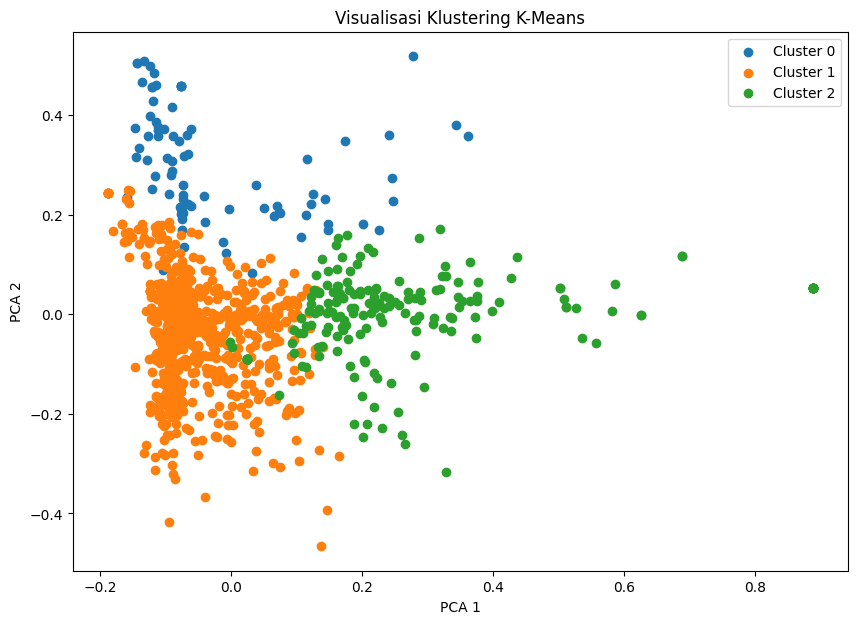

In [84]:
from sklearn.cluster import KMeans

# Menerapkan K-Means dengan 3 kluster
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Menambahkan label kluster ke dataframe
df_selected['cluster'] = kmeans.labels_

# Menentukan label positif, negatif, dan netral berdasarkan hasil kluster
# (Misalnya: Kluster 0 = Negatif, Kluster 1 = Netral, Kluster 2 = Positif)
cluster_labels = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
df_selected['sentiment'] = df_selected['cluster'].map(cluster_labels)

# Menampilkan hasil klustering
print("\n=== Hasil Klustering ===")
print(df_selected[['cleaned_content_with_stopwords', 'cluster', 'sentiment']].head(10))

# Visualisasi klustering menggunakan PCA untuk 2D plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_points = reduced_features[df_selected['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.legend()
plt.title("Visualisasi Klustering K-Means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Menampilkan hasil sebaran Sentimen Berdasarkan Klustering


=== Sebaran Sentimen ===
sentiment
Netral     903
Positif    186
Negatif     85
Name: count, dtype: int64


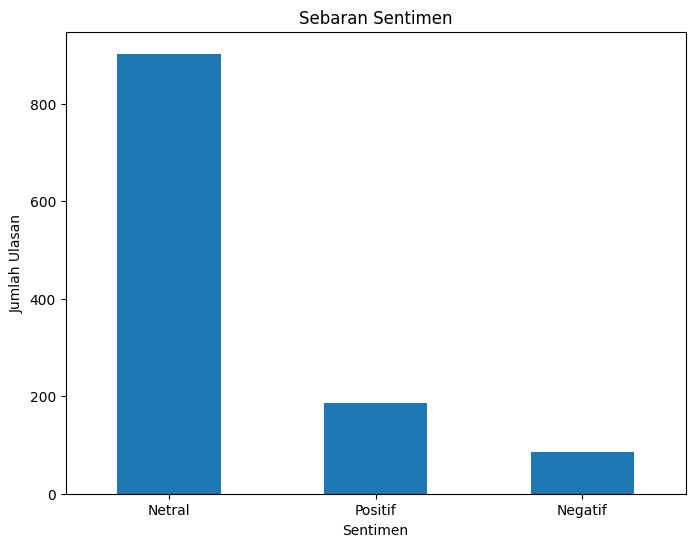

In [85]:
# Menghitung sebaran sentimen
sentiment_distribution = df_selected['sentiment'].value_counts()

# Menampilkan hasil sebaran
print("\n=== Sebaran Sentimen ===")
print(sentiment_distribution)

# Visualisasi sebaran sentimen
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar')
plt.title("Sebaran Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.xticks(rotation=0)
plt.show()


# **Categorization : Klasifikasi Algortima Naive Bayes**

---



In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah Data Latih:", X_train.shape[0])
print("Jumlah Data Uji:", X_test.shape[0])

# === GridSearchCV untuk Optimasi Model Naive Bayes ===

# Definisikan parameter yang ingin dicari
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Nilai smoothing untuk MultinomialNB
}

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print(f"\n=== Parameter Terbaik: {best_params} ===")

# Menggunakan model terbaik untuk prediksi
best_nb_model = grid_search.best_estimator_
y_pred = best_nb_model.predict(X_test)

Jumlah Data Latih: 939
Jumlah Data Uji: 235

=== Parameter Terbaik: {'alpha': 0.1} ===


Evaluasi Model


=== Confusion Matrix ===
[[  9  10   0]
 [  0 174   2]
 [  1  24  15]]


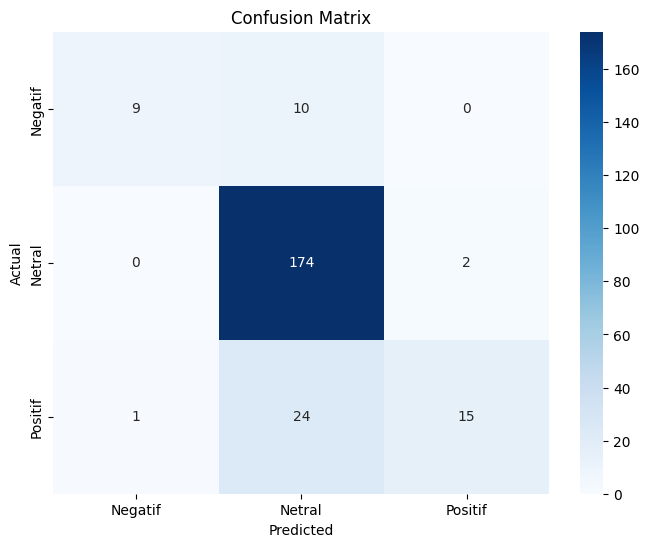


=== Classification Report ===
              precision    recall  f1-score   support

     Negatif       0.90      0.47      0.62        19
      Netral       0.84      0.99      0.91       176
     Positif       0.88      0.38      0.53        40

    accuracy                           0.84       235
   macro avg       0.87      0.61      0.68       235
weighted avg       0.85      0.84      0.82       235


=== Akurasi Model Setelah Optimasi: 0.84 ===


In [87]:
# === Evaluasi Model Terbaik ===

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n=== Confusion Matrix ===")
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Akurasi Model Setelah Optimasi: {accuracy:.2f} ===")


# **Visualization : WordCloud Setiap Sentimen**

---



WORDCLOUD UNTUK SETIAP SENTIMEN

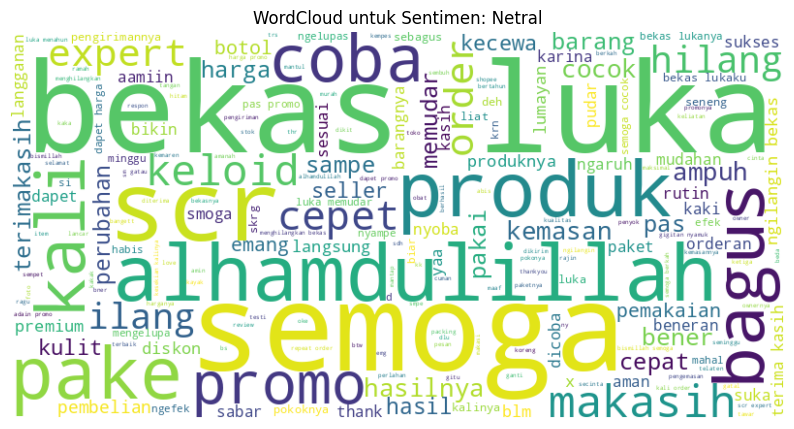

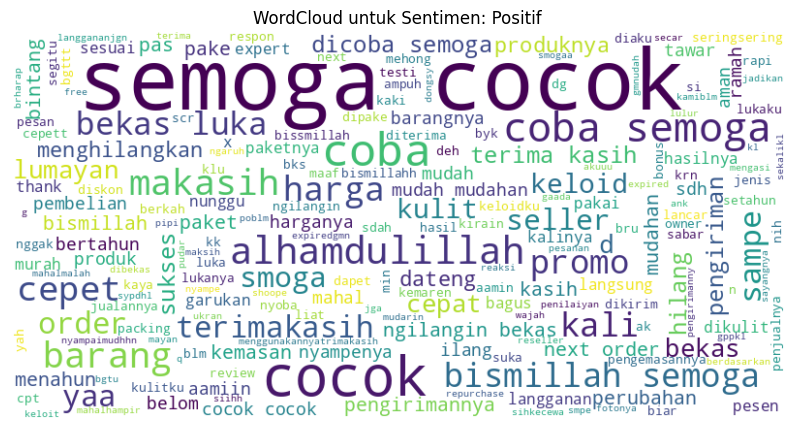

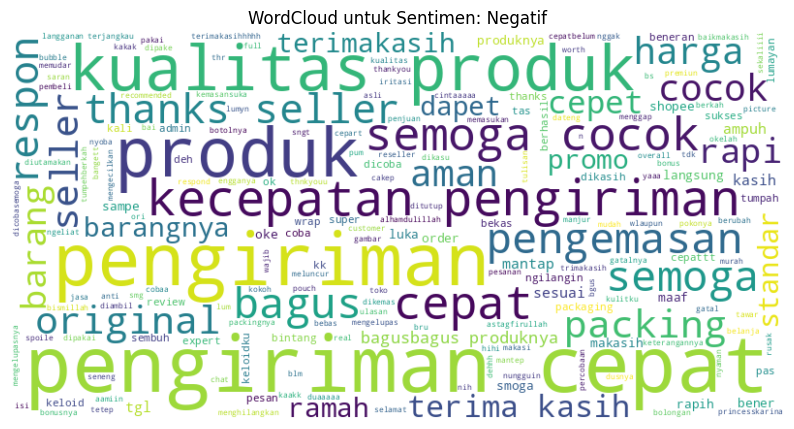

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat WordCloud untuk setiap sentimen
def generate_wordcloud(sentiment_label, df):
    # Filter teks berdasarkan sentimen
    text = " ".join(df[df['sentiment'] == sentiment_label]['cleaned_content_with_stopwords'])

    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud untuk Sentimen: {sentiment_label}")
    plt.show()

# Sentimen unik
sentiments = df_selected['sentiment'].unique()

# Generate WordCloud untuk setiap sentimen
for sentiment in sentiments:
    generate_wordcloud(sentiment, df_selected)
